<img align="left" src="https://rhyme.com/assets/img/logo-dark.png"> <h1 align="center"> Support Vector Machines</h1>

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

## Linearly separable classes:

In [3]:
#SVMs take up very little memory space and are imperative 
#when needed to test something out
#very compact models

%matplotlib inline
#'%matplotlib inline': It is a magic function that renders the 
#figure in a notebook (instead of displaying a dump of the figure object).
#via SO

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
#for more: https://seaborn.pydata.org/generated/seaborn.set.html
import seaborn as sns; sns.set()

#more about these libraries

'''NumPy is a library for the Python programming language, adding support for large,
multi-dimensional arrays and matrices, along with a large collection of high-level 
mathematical functions to operate on these arrays.'''

'''Matplotlib is a plotting library for the Python programming language and its
numerical mathematics extension NumPy.'''

'''matplotlib. pyplot is a collection of command style functions that make matplotlib
work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a 
figure, creates a plotting area in a figure, plots some lines in a plotting area,
decorates the plot with labels, etc.'''

'''SciPy is a free and open-source Python library used for scientific computing 
and technical computing.'''

'''SciPy Stats: This module contains a large number of probability distributions as 
well as a growing library of statistical functions.'''

'''Seaborn is a Python data visualization library based on matplotlib. It provides 
a high-level interface for drawing attractive and informative statistical graphics.'''

'Seaborn is a Python data visualization library based on matplotlib. It provides \na high-level interface for drawing attractive and informative statistical graphics.'

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

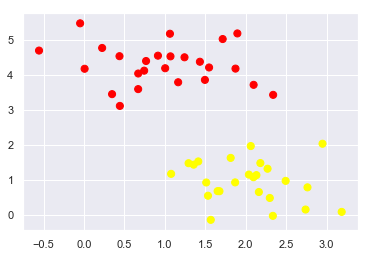

In [4]:
#The sklearn.datasets package embeds some small toy datasets
from sklearn.datasets.samples_generator import make_blobs
'''
make_blobs returns the following:
    Xarray of shape [n_samples, n_features]
    i.e. The generated samples.

    yarray of shape [n_samples]
    i.e. The integer labels for cluster membership of each sample.

    centersarray, shape [n_centers, n_features]
    i.e. The centers of each cluster. Only returned if return_centers=True.
'''
#here we only need Xarray and yarray
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

#X is a 2-dimensional array with 50 samples
#X[:,0] represents all the x-coordinates of the points (all rows, first column)
#X[:,1] represents all the y-coordinates of the points (all rows, second column)
print(X)

#y is a vector with 50 labels. The labels represent the cluster to which the instance 
#belongs to. Since there are two centers, the label of a particular instance
#can be either 0 or 1.
print(y)

#we can now use the scatter plot to visualize these random blobs.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#the first two parameters are the x and y coordinates
#c represents color. We want the blobs to be colored 
#according to their cluster labels, i.e. y, therefore, c=y
#s represents size of the blob, or marker size
#cmap represents the color scheme of the plot.



The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error.  Let's plot them below.

## Many possible separators:

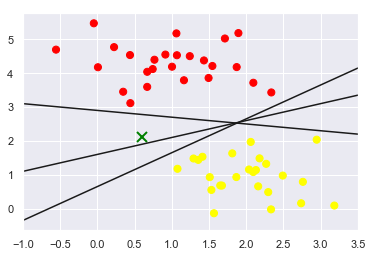

In [5]:
xfit = np.linspace(-1, 3.5)
#numpy.linspace(start, stop)
#Return evenly spaced numbers over a specified interval. 
#Returns num evenly spaced samples, calculated over the interval [start, stop]. num is 50 by default.

#creating the graph again
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#creating an x in a position (x,y) that we know is prone to being wrongly classified
plt.plot([0.6], [2.1], 'x', color = 'green', markeredgewidth=2, markersize=10)

#plot three lines with varying m (slope) and b (intercept)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    #plt.plot([x], y, '-k')
    #what is -k? 'k' is for 'black' and the '-' is for straight line
    plt.plot(xfit, m * xfit + b, '-k')

'''More about the '-k': These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue)
and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics. 
Other line options:
-    solid line
--   dashed line
-.   dot dash line
:    dotted line


'''

#x-axis limits defined within -1 and 3.5
plt.xlim(-1, 3.5);

## Maximum margin linear classifiers:

For a hyperplane defined by weight $w$ and bias $b$, a linear discriminant is given by:

$$w^T x + b \left\{\begin{matrix} \geq 0\ class +1& \\ <0\ class -1 \end{matrix}\right.$$

In the above plot, we notice that for a point $x$ that is close the decision boundary at $w^T x +b =0$, a small change in $x$ can lead to a change in classification. Now assuming that the data is linearly separable, we impose that for the training data, the decision boundary should be separated from the data by some finite amount $\epsilon ^2$:

$$w^T x + b \left\{\begin{matrix} \geq \epsilon^2\ class +1& \\ <-\epsilon^2\ class -1 \end{matrix}\right.$$

For the inequality above, we conveniently set $\epsilon = 1$ so that a point $x_+$ from class +1 that is closest to the decision boundary satisfies

 $$w^T x_+ + b =1$$

and a point $x_-$ from class -1 that is closest to the decision boundary satisfies

 $$w^T x_- + b =-1$$

## Plotting the margins:

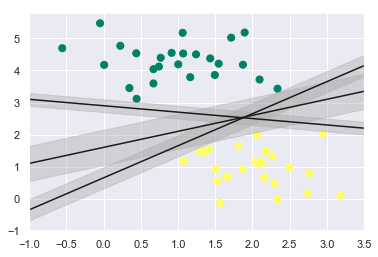

In [6]:
#again
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

#d is the pre-calculated thickness
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

When using SVMs, the decision boundary that maximizes this *margin* is chosen as the optimal model. 

## (Optional) What is the (hard) margin?

From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimization problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# SVM in practice:

Using the data from before, let us now train an SVM model with Scikit-Learn's suppport vector classifier. We'll defer the discussion about kernels for later in the course. For the time being, we will use a `linear` kernel and set the `C` parameter to an arbitrarily large number.

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Visualizing the SVM decision boundaries:

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        #gca() -> get current axes 
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    #Meshgrid: Return coordinate matrices from coordinate vectors.
    #Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector 
    #fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
    Y, X = np.meshgrid(y, x)
    
    '''
    VSTACK
    
    Stack arrays in sequence vertically (row wise).
    
    This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have
    been reshaped to (1,N). Rebuilds arrays divided by vsplit.
    
    This function makes most sense for arrays with up to 3 dimensions. For instance, 
    for pixel-data with a height (first axis), width (second axis), and r/g/b channels (third axis). 
    
    The functions concatenate, stack and block provide more general stacking and concatenation operations.
    '''
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    
    #the decision_function will generate scores for every x,y pair, and will 
    #thus determine on which side of the separator the data instance will lie.
    
    #also, reshaping the model as per the shape of X
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

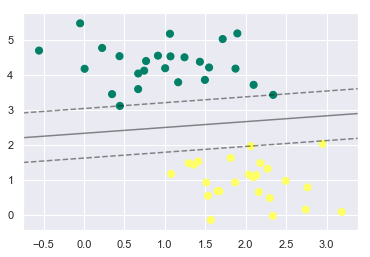

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

The bold line dividing the data maximizes the margin between the two sets of points. Count the number of training points just touching the margin. These three points are known as the *support vectors*. These points exactly satisfying the margin are stored in the `support_vectors_` attribute of the classifier in Scikit-Learn.

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Discussion:

In the hard-margin SVM classifier, only the position of the support vectors matter. Points away from the margin which are not on the correct side don't change the fit! This is because these points do not contribute to the loss function used to fit the model. 

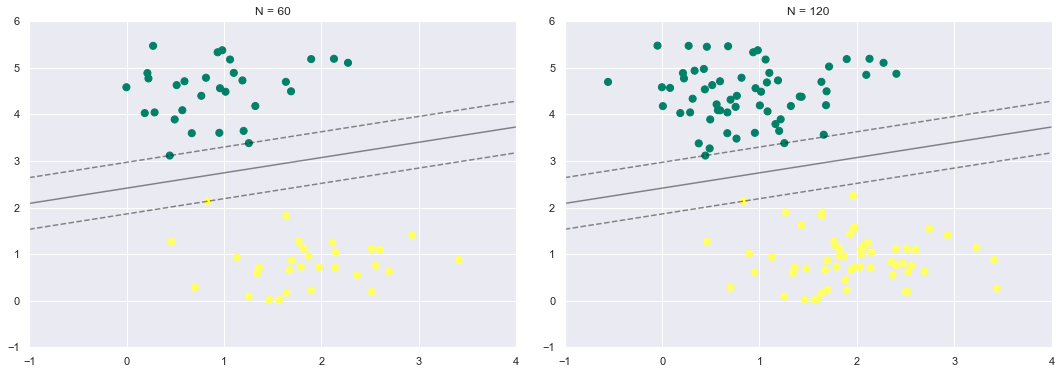

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

## Interactive visualization:

In [12]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200, 10), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

## The Kernel trick and non-linear boundaries:

In working with linear algebra and linear regression, we have come across a version of kernels before, in the form of basis functions. We use a similar approach with kernels, where our data is projected into a higher-dimensional space $\Re^d$ defined by a polynomial $\Phi$ of order $\mathbb{Q}$ and a basis function, and thereby fit for nonlinear relationships with a linear classifier.

Let's now plot some data that is not linearly separable:

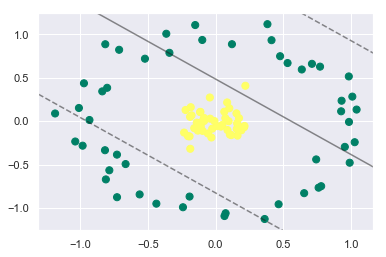

In [13]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf, plot_support=False);

On running the cell a couple of times, I think you can tell that there is no linear decision boundary that will ever be able to separate the data. Here is where kernels come in handy. We can project our data into a high dimensional space where there exists a linear separater. One widely used projection is computed using a *radial basis function* centered on the middle clump.

In [14]:
r = np.exp(-(X ** 2).sum(1))

## Visualizing higher-dimensional projections:

In [15]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='summer')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

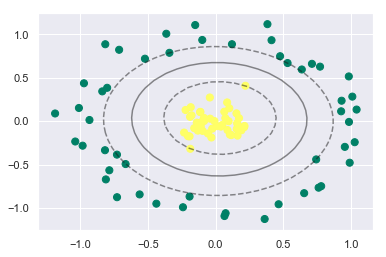

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Example: Facial Recognition

In [18]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


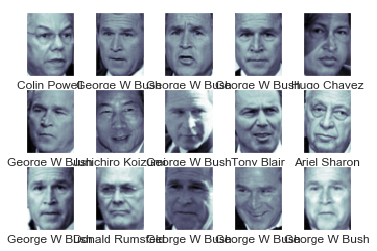

In [19]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [35]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
pca = PCA(n_components = 150, whiten = True, random_state =42, svd_solver='randomized')
#random state assigned randomly

svc = SVC(kernel='rbf', class_weight = 'balanced')
#rbf = radial basis function (read up on this)
model = make_pipeline(pca, svc)

In [36]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [37]:
#cross validation
#this is new. I haven't done grid search cv before

#grid search cv for finding the optimal parameters

#so

from sklearn.grid_search import GridSearchCV

param_grid = {'svc__C':[1,5,10,50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

#now to time how long it's gonna take for the training to complete
#this is a % statement so the '=' is not required 
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


#based on the following results of the above code block:
#Wall time: 20.2 s
#{'svc__C': 5, 'svc__gamma': 0.001}

#second time run:
#Wall time: 20.4 s
#{'svc__C': 10, 'svc__gamma': 0.001}

#we can see that the values lie towards the center of the grid and are
#thus optimal. If the values were towards the edges,
#we'd have to expand the parameters of the grid even more because the given parameters,
#would not be close to optimal.

Wall time: 20.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [39]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


Text(0.5,0.98,'Predicted Names, Incorrect Labels in Red')

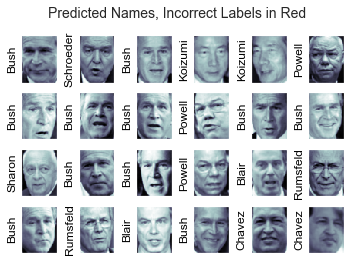

In [25]:
#now to visualise the results using a sample

#initialize the figures as fig and sth idk

#4 rows and 6 columns of sample images to be labeled
#multiple subplots (emphasis on plural)
fig, ax = plt.subplots(4,6)

#iterate for each subplot

for i, axi in enumerate(ax.flat):
    #what is ax.flat?
    axi.imshow(Xtest[i].reshape(62,47), cmap = 'bone')
    #okay so show the image after resizing and in b&w
    #then
    axi.set(xticks=[], yticks=[])
    #idk what this is. we'll remove and see
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'black' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names, Incorrect Labels in Red', size = 14)



In [26]:
#evaluating the svm model

from sklearn.metrics import classification_report

print(classification_report(ytest, yfit,
                           target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.71      0.81      0.76        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.73      0.83      0.78        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.83      0.95      0.89        42

      avg / total       0.86      0.84      0.84       337



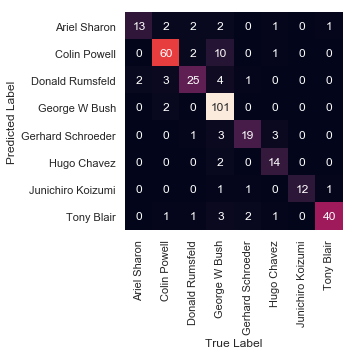

In [27]:
#writing code for a confusion matrix 

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot = True, fmt = 'd', cbar = False,
           xticklabels = faces.target_names,
           yticklabels = faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [28]:
#end of code